In [17]:
import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


In [47]:
#linear regression
class linearregression():
    def __init__( self,learning_rate,iterations):
        self.learning_rate=learning_rate
        self.iterations=iterations
    #model training function
    def fit(self,x,y):
        #no of training examples , no of features
        self.m,self.n=x.shape
        #weight initialization
        self.w=np.zeros(self.n)
        self.b=0
        self.x=x
        self.y=y

    #gradient descent learning
        for i in range(self.iterations):
            self.update_weights()
        return self
    # function to update weights in gradient descent
    def update_weights(self):
        y_pred=self.predict(self.x)
        #calculate gradients
        dw=-(2*(self.x.T).dot(self.y-y_pred))/self.m
        db=-2*np.sum(self.y-y_pred)/self.m
        #update weights
        self.w=self.w-self.learning_rate*dw
        self.b=self.b-self.learning_rate*db
        return self
    #hypothetical function
    def predict(self,x):
        return x.dot(self.w)+self.b


    
    

predicted values  [ 40594.69 123305.18  65031.88]
real values  [ 37731 122391  57081]
trained w     9398.92
trained b    26496.31


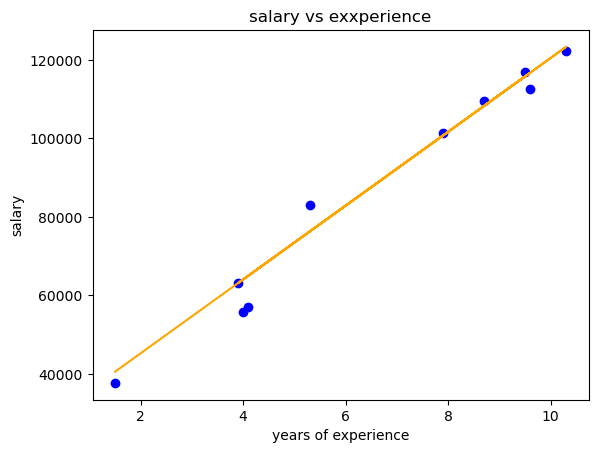

In [48]:
#driver code
def main():
    #importing data sets
    df=pd.read_csv("salary_data.csv")
    x=df.iloc[:,:-1].values
    y=df.iloc[:,1].values
    #spliting into train and set
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=0)
    #model training
    model=linearregression(iterations=1000,learning_rate=0.01)
    model.fit(x_train,y_train)
    #prediction to test set
    y_pred=model.predict(x_test)
    print("predicted values ",np.round(y_pred[:3],2))
    print("real values ",y_test[:3])
    print("trained w    " , np.round(model.w[0],2))
    print("trained b   ", np.round(model.b,2))
#visualisation on test set
    plt.scatter(x_test,y_test,color='blue')
    plt.plot(x_test,y_pred,color='orange')
    plt.title('salary vs exxperience')
    plt.xlabel('years of experience')
    plt.ylabel('salary')
    plt.show()

if __name__=="__main__":
    main()